In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('data/inventory_delivery_forecast_data.csv')

In [7]:
# Convert delivery_date to datetime
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [8]:
# Extract temporal features for better pattern recognition
df['year'] = df['delivery_date'].dt.year
df['month'] = df['delivery_date'].dt.month
df['day_of_week'] = df['delivery_date'].dt.dayofweek
df['is_monday'] = (df['delivery_date'].dt.dayofweek == 0).astype(int)  # Monday delivery
df['is_saturday'] = (df['delivery_date'].dt.dayofweek == 5).astype(int)  # Saturday delivery
df['week_of_year'] = df['delivery_date'].dt.isocalendar().week

In [9]:
# Create seasonality features
df['season'] = df['month'].map({12: 'winter', 1: 'winter', 2: 'winter',
                                3: 'spring', 4: 'spring', 5: 'spring',
                                6: 'summer', 7: 'summer', 8: 'summer',
                                9: 'fall', 10: 'fall', 11: 'fall'})

In [10]:
# Add total inventory and ratios for better anomaly detection
df['total_inventory'] = df[['wings', 'tenders', 'fries_reg', 'fries_large', 'veggies', 'dips', 'drinks', 'flavours']].sum(axis=1)
df['wings_ratio'] = df['wings'] / df['total_inventory']
df['protein_ratio'] = (df['wings'] + df['tenders']) / df['total_inventory']
df['sides_ratio'] = (df['fries_reg'] + df['fries_large'] + df['veggies']) / df['total_inventory']
df['beverages_ratio'] = df['drinks'] / df['total_inventory']

In [11]:
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

print("\nData types:")
display(df.dtypes)

print("\nBasic statistics:")
display(df.describe())

Dataset shape: (106, 21)

First few rows:


,delivery_date,wings,tenders,fries_reg,fries_large,veggies,dips,drinks,flavours,year,...,day_of_week,is_monday,is_saturday,week_of_year,season,total_inventory,wings_ratio,protein_ratio,sides_ratio,beverages_ratio
0,2023-12-30,5714,756,136,190,179,570,246,832,2023,...,5,0,1,52,winter,8623,0.662646,0.750319,0.058564,0.028528
1,2024-01-01,5139,545,131,145,140,471,217,721,2024,...,0,1,0,1,winter,7509,0.684379,0.756958,0.055400,0.028899
2,2024-01-06,5225,577,117,160,157,475,175,718,2024,...,5,0,1,1,winter,7604,0.687138,0.763019,0.057075,0.023014
3,2024-01-08,4682,623,157,137,132,470,237,735,2024,...,0,1,0,2,winter,7173,0.652725,0.739579,0.059389,0.033041
4,2024-01-13,4571,628,144,108,106,388,184,709,2024,...,5,0,1,2,winter,6838,0.668470,0.760310,0.052354,0.026908



Data types:


,0
delivery_date,datetime64[ns]
wings,int64
tenders,int64
fries_reg,int64
fries_large,int64
veggies,int64
dips,int64
drinks,int64
flavours,int64
year,int32



Basic statistics:


,delivery_date,wings,tenders,fries_reg,fries_large,veggies,dips,drinks,flavours,year,month,day_of_week,is_monday,is_saturday,week_of_year,total_inventory,wings_ratio,protein_ratio,sides_ratio,beverages_ratio
count,106,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2024-06-30 00:00:00,4926.537736,690.830189,136.264151,152.594340,145.405660,490.773585,216.358491,759.094340,2023.990566,6.575472,2.500000,0.500000,0.500000,26.5,7517.858491,0.654695,0.746646,0.057814,0.029016
min,2023-12-30 00:00:00,1108.000000,112.000000,38.000000,37.000000,37.000000,123.000000,68.000000,182.000000,2023.000000,1.000000,0.000000,0.000000,0.000000,1.0,1720.000000,0.560006,0.705526,0.045698,0.021369
25%,2024-03-30 12:00:00,4487.000000,609.250000,125.250000,137.000000,129.000000,444.750000,194.000000,703.500000,2024.000000,4.000000,0.000000,0.000000,0.000000,13.25,6928.250000,0.641011,0.741027,0.055095,0.026477
50%,2024-06-30 00:00:00,4931.000000,676.500000,135.500000,148.500000,141.500000,475.500000,218.500000,756.500000,2024.000000,7.000000,2.500000,0.500000,0.500000,26.5,7439.500000,0.657467,0.747803,0.057493,0.028860
75%,2024-09-29 12:00:00,5408.500000,789.000000,148.000000,172.000000,164.750000,542.750000,237.750000,828.250000,2024.000000,9.750000,5.000000,1.000000,1.000000,39.75,8217.500000,0.669855,0.755723,0.060409,0.030867
max,2024-12-30 00:00:00,6898.000000,1210.000000,206.000000,233.000000,220.000000,678.000000,332.000000,1040.000000,2024.000000,12.000000,5.000000,1.000000,1.000000,52.0,10463.000000,0.718158,0.775937,0.068023,0.043969
std,NaN,885.912090,163.685265,26.955449,32.619824,31.187842,89.605621,40.671785,121.870621,0.097129,3.494071,2.511877,0.502375,0.502375,15.345699,1271.482947,0.025830,0.013067,0.004155,0.003988


In [12]:
missing_values = df.isnull().sum()
print("\nMissing values per column:")
display(missing_values)


Missing values per column:


,0
delivery_date,0
wings,0
tenders,0
fries_reg,0
fries_large,0
veggies,0
dips,0
drinks,0
flavours,0
year,0


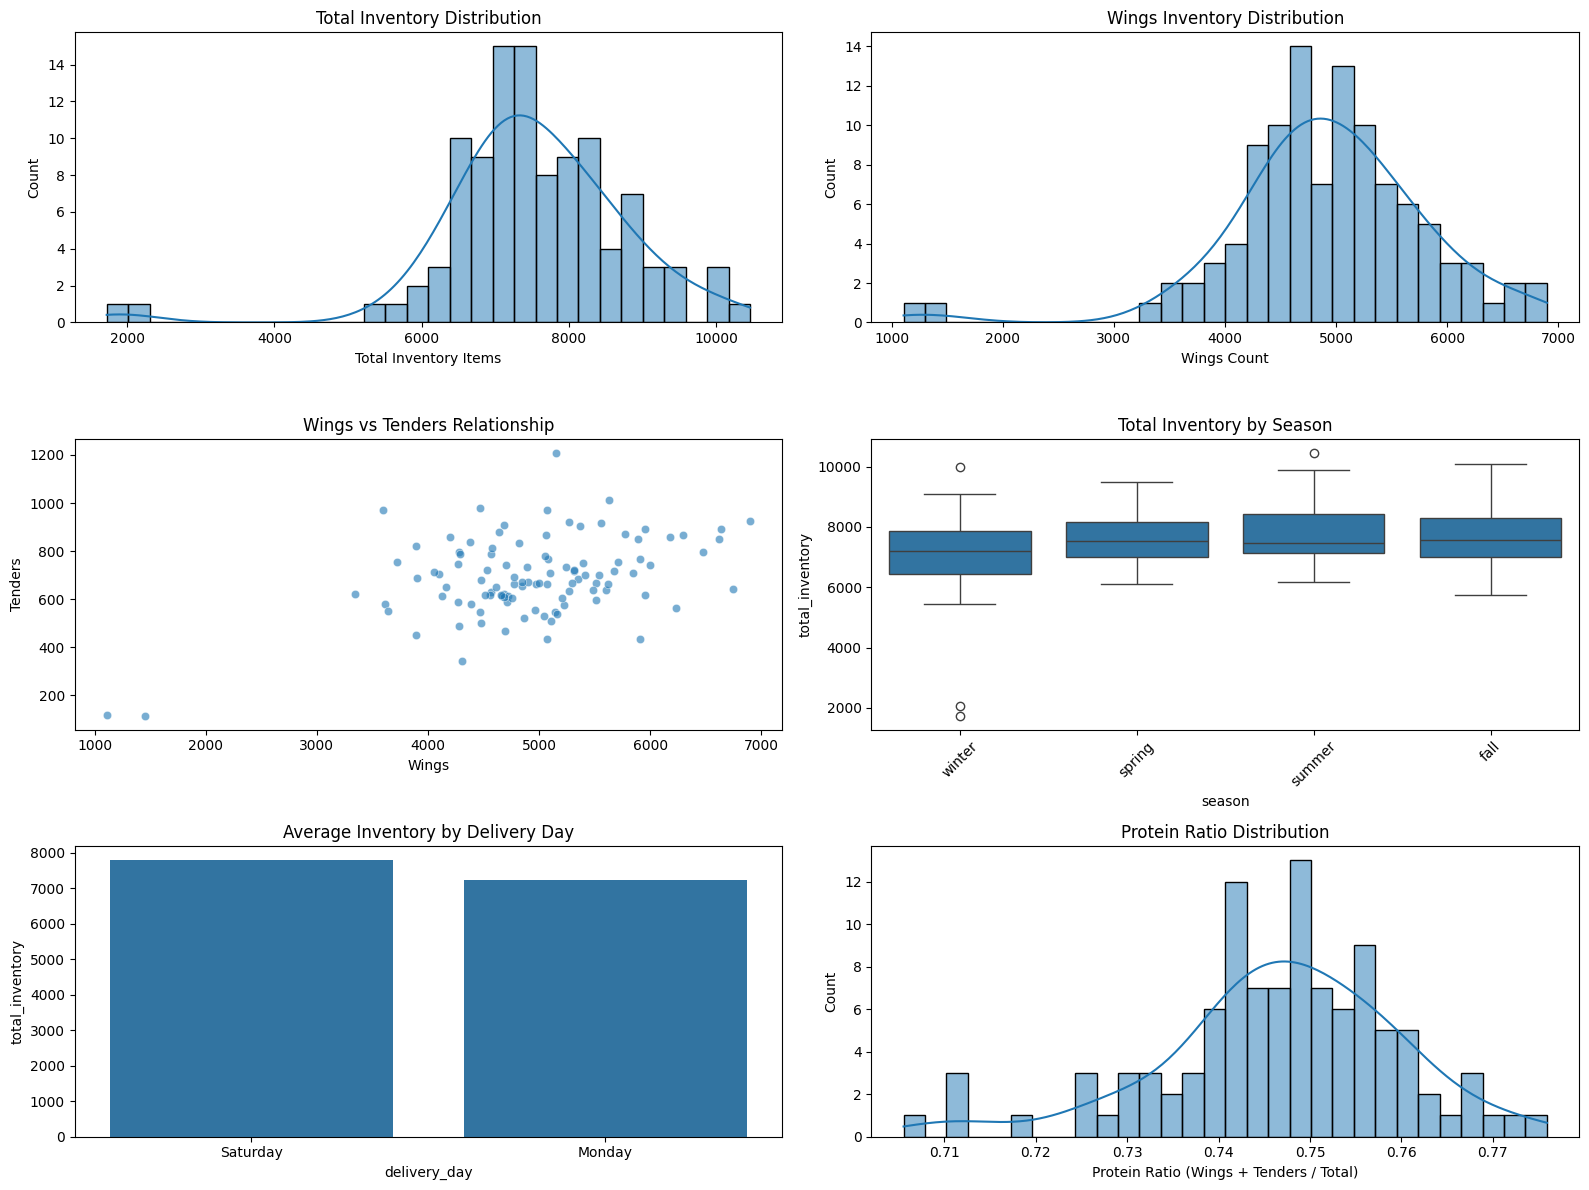

In [16]:
plt.figure(figsize=(16, 12))

# Plot 1: Total inventory distribution
plt.subplot(3, 2, 1)
sns.histplot(df['total_inventory'], kde=True, bins=30)
plt.title('Total Inventory Distribution')
plt.xlabel('Total Inventory Items')

# Plot 2: Wings distribution (main protein)
plt.subplot(3, 2, 2)
sns.histplot(df['wings'], kde=True, bins=30)
plt.title('Wings Inventory Distribution')
plt.xlabel('Wings Count')

# Plot 3: Wings vs Tenders relationship
plt.subplot(3, 2, 3)
sns.scatterplot(x='wings', y='tenders', data=df, alpha=0.6)
plt.title('Wings vs Tenders Relationship')
plt.xlabel('Wings')
plt.ylabel('Tenders')

# Plot 4: Inventory by season
plt.subplot(3, 2, 4)
sns.boxplot(x='season', y='total_inventory', data=df)
plt.title('Total Inventory by Season')
plt.xticks(rotation=45)

# Plot 5: Delivery day patterns
plt.subplot(3, 2, 5)
delivery_day_totals = df.groupby(['is_monday', 'is_saturday']).agg({
    'total_inventory': 'mean'
}).reset_index()
delivery_day_totals['delivery_day'] = delivery_day_totals.apply(
    lambda x: 'Monday' if x['is_monday'] else 'Saturday', axis=1
)
sns.barplot(x='delivery_day', y='total_inventory', data=delivery_day_totals)
plt.title('Average Inventory by Delivery Day')

# Plot 6: Protein ratio distribution
plt.subplot(3, 2, 6)
sns.histplot(df['protein_ratio'], kde=True, bins=30)
plt.title('Protein Ratio Distribution')
plt.xlabel('Protein Ratio (Wings + Tenders / Total)')

plt.tight_layout()
plt.show()

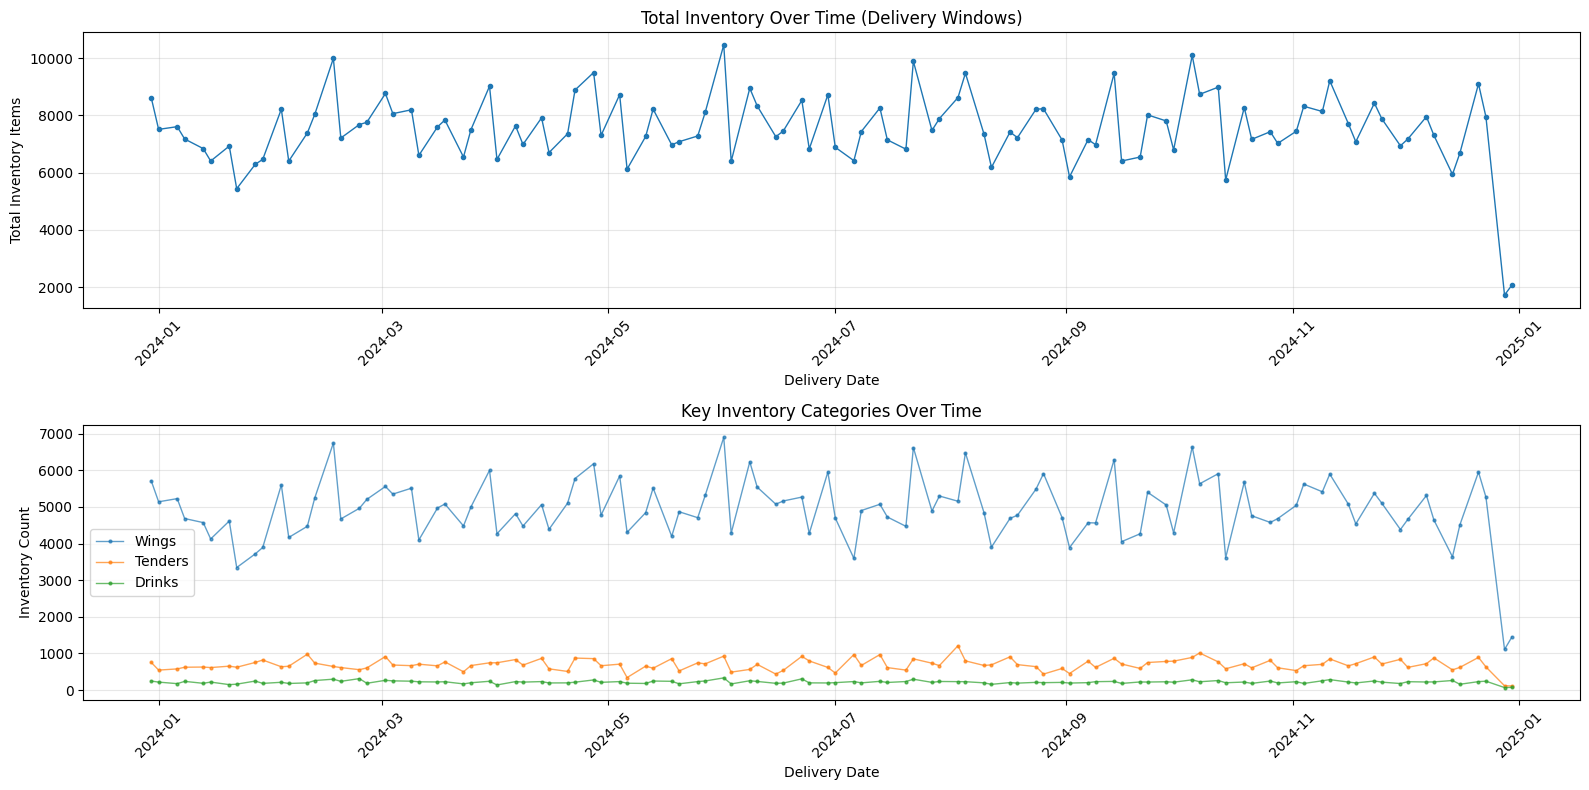

In [18]:
# Enhanced time series visualization for inventory patterns
plt.figure(figsize=(16, 8))

# Sort by delivery date for proper time series
df_time = df.sort_values('delivery_date')

# Plot 1: Total inventory over time
plt.subplot(2, 1, 1)
plt.plot(df_time['delivery_date'], df_time['total_inventory'], marker='o', linewidth=1, markersize=3)
plt.title('Total Inventory Over Time (Delivery Windows)')
plt.xlabel('Delivery Date')
plt.ylabel('Total Inventory Items')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 2: Individual inventory categories over time
plt.subplot(2, 1, 2)
for item in ['wings', 'tenders', 'drinks']:  # Show main categories
    plt.plot(df_time['delivery_date'], df_time[item], marker='o',
             linewidth=1, markersize=2, label=item.capitalize(), alpha=0.7)

plt.title('Key Inventory Categories Over Time')
plt.xlabel('Delivery Date')
plt.ylabel('Inventory Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import optuna
from optuna.samplers import TPESampler

In [22]:
inventory_features = ['wings', 'tenders', 'fries_reg', 'fries_large', 'veggies', 'dips', 'drinks', 'flavours']
ratio_features = ['wings_ratio', 'protein_ratio', 'sides_ratio', 'beverages_ratio']
temporal_features = ['month', 'day_of_week', 'week_of_year', 'is_monday', 'is_saturday']

feature_columns = inventory_features + ratio_features + temporal_features + ['total_inventory']

print(f"Selected features: {feature_columns}")
print(f"Total number of features: {len(feature_columns)}")

Selected features: ['wings', 'tenders', 'fries_reg', 'fries_large', 'veggies', 'dips', 'drinks', 'flavours', 'wings_ratio', 'protein_ratio', 'sides_ratio', 'beverages_ratio', 'month', 'day_of_week', 'week_of_year', 'is_monday', 'is_saturday', 'total_inventory']
Total number of features: 18


In [24]:
df_sorted = df.sort_values('delivery_date')

# Create lag features for key inventory items
for item in ['wings', 'tenders', 'total_inventory']:
    df_sorted[f'{item}_lag1'] = df_sorted[item].shift(1)
    df_sorted[f'{item}_lag2'] = df_sorted[item].shift(2)

# Create rolling statistics for trend detection
df_sorted['total_inventory_rolling_mean'] = df_sorted['total_inventory'].shift(1).rolling(window=4).mean()
df_sorted['wings_rolling_std'] = df_sorted['wings'].shift(1).rolling(window=4).std()

# Add these to feature columns if they exist (after calculating)
lag_features = [col for col in df_sorted.columns if '_lag' in col or '_rolling_' in col]

# Update the dataframe
df = df_sorted.dropna()  # Remove rows with NaN from lag calculations

print(f"Added lag and rolling features: {lag_features}")
print(f"Dataset shape after feature engineering: {df.shape}")

Added lag and rolling features: ['wings_lag1', 'wings_lag2', 'tenders_lag1', 'tenders_lag2', 'total_inventory_lag1', 'total_inventory_lag2', 'total_inventory_rolling_mean', 'wings_rolling_std']
Dataset shape after feature engineering: (102, 29)


In [25]:
final_features = feature_columns + lag_features

final_features = [col for col in final_features if col in df.columns]

print(f"Final feature set: {final_features}")
print(f"Number of features: {len(final_features)}")

X = df[final_features].values
print(f"Feature matrix shape: {X.shape}")

Final feature set: ['wings', 'tenders', 'fries_reg', 'fries_large', 'veggies', 'dips', 'drinks', 'flavours', 'wings_ratio', 'protein_ratio', 'sides_ratio', 'beverages_ratio', 'month', 'day_of_week', 'week_of_year', 'is_monday', 'is_saturday', 'total_inventory', 'wings_lag1', 'wings_lag2', 'tenders_lag1', 'tenders_lag2', 'total_inventory_lag1', 'total_inventory_lag2', 'total_inventory_rolling_mean', 'wings_rolling_std']
Number of features: 26
Feature matrix shape: (102, 26)


In [26]:
from sklearn.preprocessing import RobustScaler
import numpy as np

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

print(f"Scaled feature matrix shape: {X_scaled.shape}")
print(f"Feature scaling completed with RobustScaler")
print(f"Scaled data range: [{X_scaled.min():.3f}, {X_scaled.max():.3f}]")

Scaled feature matrix shape: (102, 26)
Feature scaling completed with RobustScaler
Scaled data range: [-4.560, 3.440]


In [27]:
X_train, X_val = train_test_split(X_scaled, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Training set shape: (81, 26)
Validation set shape: (21, 26)


In [29]:
def create_improved_autoencoder(trial):
    n_layers = trial.suggest_int('n_layers', 2, 4)
    encoder_units = trial.suggest_int('encoder_units', 32, 128, step=16)
    latent_dim = trial.suggest_int('latent_dim', 8, 24)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.4)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    activation = trial.suggest_categorical('activation', ['relu', 'elu', 'swish'])
    l2_reg = trial.suggest_float('l2_regularization', 1e-6, 1e-3, log=True)

    # Input layer
    input_dim = X_train.shape[1]
    inputs = Input(shape=(input_dim,))

    # Enhanced encoder with regularization
    x = inputs
    for i in range(n_layers):
        units = encoder_units // (2**i)
        x = Dense(units, activation=activation, kernel_regularizer=l2(l2_reg))(x)
        x = Dropout(dropout_rate)(x)

    # Bottleneck layer with constraint
    encoded = Dense(latent_dim, activation=activation, kernel_regularizer=l2(l2_reg), name='bottleneck')(x)

    # Enhanced decoder with skip connections
    x = encoded
    decoder_layers = []

    # Build decoder layers
    for i in range(n_layers):
        units = encoder_units // (2**(n_layers-i-1))
        x = Dense(units, activation=activation, kernel_regularizer=l2(l2_reg))(x)
        x = Dropout(dropout_rate)(x)
        decoder_layers.append(x)

    # Output layer with appropriate activation for scaled data
    outputs = Dense(input_dim, activation='linear')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # optimizer
    optimizer = Adam(learning_rate=learning_rate, clipnorm=1.0)

    # Compile with Huber loss for robustness
    model.compile(
        optimizer=optimizer,
        loss='huber',
        metrics=['mae']
    )

    return model

In [31]:
def enhanced_objective(trial):
    model = create_improved_autoencoder(trial)

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        min_delta=1e-6
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=8,
        min_lr=1e-6,
        verbose=0
    )

    # Train
    history = model.fit(
        X_train, X_train,
        epochs=150,
        batch_size=trial.suggest_int('batch_size', 8, 32, step=8),
        validation_data=(X_val, X_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )

    # Return best validation loss
    return min(history.history['val_loss'])

In [34]:
study = optuna.create_study(
    direction='minimize',
    sampler=TPESampler(seed=42)
)

[I 2025-08-07 20:34:34,235] A new study created in memory with name: no-name-3e3798db-849f-45a5-9e48-f6e5501ac3eb


In [35]:
study.optimize(enhanced_objective, n_trials=75, show_progress_bar=True)

print('Enhanced optimization results:')
print(f'Best trial: {study.best_trial.number}')
print(f'Best value: {study.best_value:.8f}')
print('Best params:')
for key, value in study.best_params.items():
    print(f'    {key}: {value}')

  0%|          | 0/75 [00:00<?, ?it/s]

[I 2025-08-07 20:35:15,772] Trial 0 finished with value: 0.22133752703666687 and parameters: {'n_layers': 3, 'encoder_units': 128, 'latent_dim': 20, 'dropout_rate': 0.279597545259111, 'learning_rate': 0.0002051338263087451, 'activation': 'swish', 'l2_regularization': 6.358358856676247e-05, 'batch_size': 24}. Best is trial 0 with value: 0.22133752703666687.
[I 2025-08-07 20:35:40,365] Trial 1 finished with value: 0.12195076048374176 and parameters: {'n_layers': 2, 'encoder_units': 128, 'latent_dim': 22, 'dropout_rate': 0.16370173320348286, 'learning_rate': 0.0002310201887845295, 'activation': 'swish', 'l2_regularization': 1.9762189340280066e-05, 'batch_size': 16}. Best is trial 1 with value: 0.12195076048374176.
[I 2025-08-07 20:36:07,128] Trial 2 finished with value: 0.2588125765323639 and parameters: {'n_layers': 3, 'encoder_units': 32, 'latent_dim': 12, 'dropout_rate': 0.20990855298810754, 'learning_rate': 0.000816845589476017, 'activation': 'relu', 'l2_regularization': 5.98747491046

In [36]:
print(f"Number of completed trials: {len(study.trials)}")
print(f"Best value so far: {study.best_value}")

Number of completed trials: 75
Best value so far: 0.05266839638352394


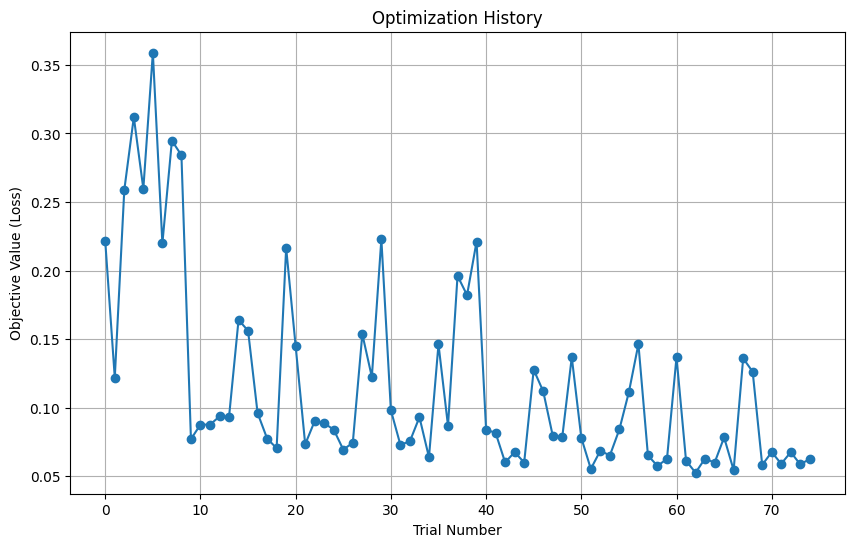

In [37]:
trial_numbers = [t.number for t in study.trials]
values = [t.value for t in study.trials if t.value is not None]

plt.figure(figsize=(10, 6))
plt.plot(trial_numbers, values, 'o-')
plt.xlabel('Trial Number')
plt.ylabel('Objective Value (Loss)')
plt.title('Optimization History')
plt.grid(True)
plt.show()

In [39]:
# Train the best model with enhanced training
best_model = create_improved_autoencoder(study.best_trial)

# Enhanced callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    min_delta=1e-7
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

# Save best model during training
checkpoint = ModelCheckpoint(
    'best_inventory_autoencoder.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train with optimal batch size from study
optimal_batch_size = study.best_params['batch_size']

print(f"Training final model with batch size: {optimal_batch_size}")

history = best_model.fit(
    X_train, X_train,
    epochs=200,
    batch_size=optimal_batch_size,
    validation_data=(X_val, X_val),
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

Training final model with batch size: 8
Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.2475 - mae: 0.5728
Epoch 1: val_loss improved from inf to 0.26425, saving model to best_inventory_autoencoder.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step - loss: 0.2478 - mae: 0.5728 - val_loss: 0.2642 - val_mae: 0.5747 - learning_rate: 0.0017
Epoch 2/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1574 - mae: 0.4438
Epoch 2: val_loss improved from 0.26425 to 0.20201, saving model to best_inventory_autoencoder.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1885 - mae: 0.4849 - val_loss: 0.2020 - val_mae: 0.4933 - learning_rate: 0.0017
Epoch 3/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1406 - mae: 0.4130
Epoch 3: val_loss improved from 0.20201 to 0.17228, saving model to best_inventory_autoencoder.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1536 - mae: 0.4335 - val_loss: 0.1723 - val_mae: 0.4456 - learning_rate: 0.0017
Epoch 4/200
 1/11 ━━━━━━━

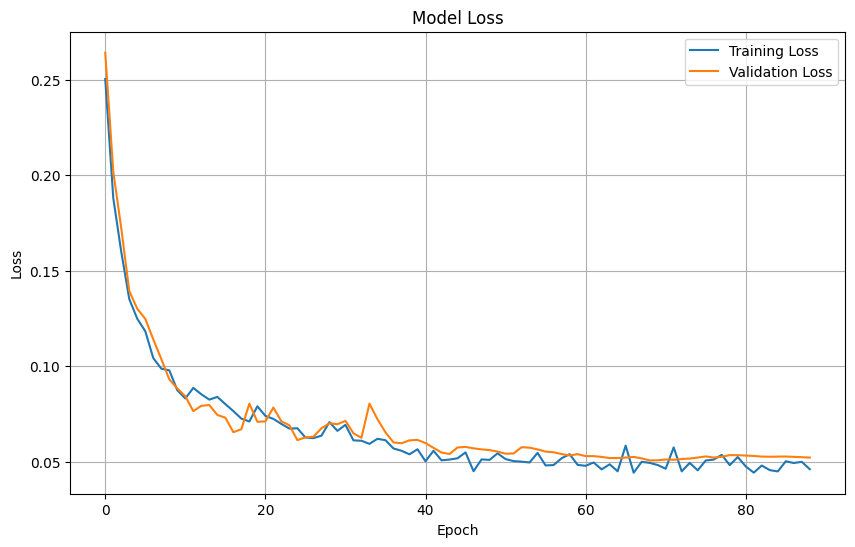

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
train_pred = best_model.predict(X_train, verbose=0)
train_reconstruction_errors = np.mean(np.square(X_train - train_pred), axis=1)

In [42]:
thresholds = {
    'conservative': np.percentile(train_reconstruction_errors, 99),    # Very few anomalies
    'balanced': np.percentile(train_reconstruction_errors, 95),       # Balanced approach
    'sensitive': np.percentile(train_reconstruction_errors, 90)       # More sensitive to anomalies
}

In [44]:
print("Anomaly detection thresholds:")
for name, threshold in thresholds.items():
    anomaly_count = np.sum(train_reconstruction_errors > threshold)
    percentage = 100 * anomaly_count / len(train_reconstruction_errors)
    print(f"{name.capitalize()}: {threshold:.6f} ({anomaly_count} anomalies, {percentage:.1f}%)")

Anomaly detection thresholds:
Conservative: 0.062635 (1 anomalies, 1.2%)
Balanced: 0.041908 (4 anomalies, 4.9%)
Sensitive: 0.036536 (8 anomalies, 9.9%)


In [45]:
# Use balanced threshold as default
threshold = thresholds['balanced']

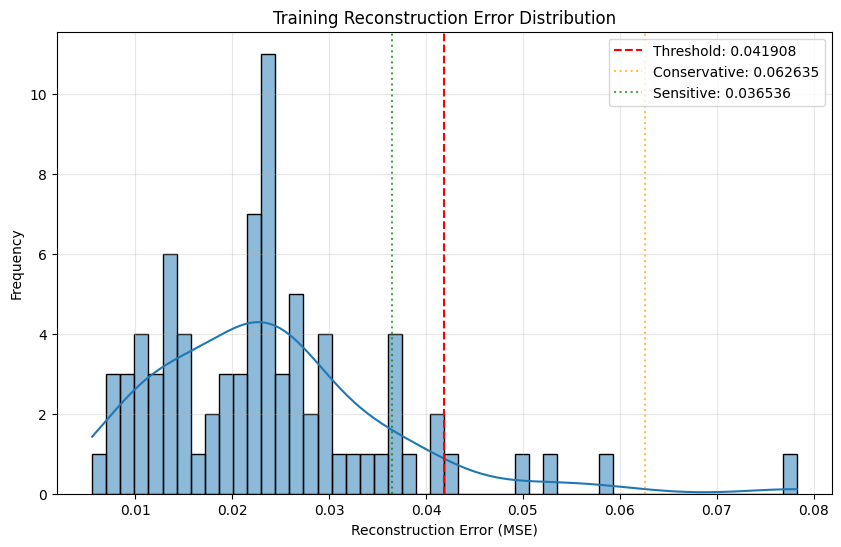

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(train_reconstruction_errors, kde=True, bins=50)
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.6f}')

# Add threshold lines for all sensitivity levels
plt.axvline(x=thresholds['conservative'], color='orange', linestyle=':',
           label=f'Conservative: {thresholds["conservative"]:.6f}', alpha=0.7)
plt.axvline(x=thresholds['sensitive'], color='green', linestyle=':',
           label=f'Sensitive: {thresholds["sensitive"]:.6f}', alpha=0.7)

plt.title('Training Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [52]:
full_pred = best_model.predict(X_scaled, verbose=0)
full_reconstruction_errors = np.mean(np.square(X_scaled - full_pred), axis=1)

In [53]:
df['reconstruction_error'] = full_reconstruction_errors
df['is_anomaly'] = df['reconstruction_error'] > threshold

/tmp/ipython-input-588462167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reconstruction_error'] = full_reconstruction_errors
/tmp/ipython-input-588462167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_anomaly'] = df['reconstruction_error'] > threshold


In [56]:
total_anomalies = df['is_anomaly'].sum()
anomaly_percentage = 100 * total_anomalies / len(df)

print(f"Enhanced Anomaly Detection Results:")
print(f"Total anomalies detected: {total_anomalies} out of {len(df)} delivery windows")
print(f"Anomaly percentage: {anomaly_percentage:.2f}%")

Enhanced Anomaly Detection Results:
Total anomalies detected: 18 out of 102 delivery windows
Anomaly percentage: 17.65%


In [57]:
anomaly_data = df[df['is_anomaly'] == True]

if len(anomaly_data) > 0:
    print(f"\nAnomalous Delivery Windows Analysis:")
    print(f"Average total inventory in anomalies: {anomaly_data['total_inventory'].mean():.0f}")
    print(f"Average total inventory overall: {df['total_inventory'].mean():.0f}")

    print(f"\nMost anomalous inventory categories:")
    for item in inventory_features:
        anomaly_avg = anomaly_data[item].mean()
        normal_avg = df[~df['is_anomaly']][item].mean()
        ratio = anomaly_avg / normal_avg if normal_avg > 0 else 0
        print(f"  {item}: {anomaly_avg:.0f} vs {normal_avg:.0f} (ratio: {ratio:.2f})")


Anomalous Delivery Windows Analysis:
Average total inventory in anomalies: 7213
Average total inventory overall: 7510

Most anomalous inventory categories:
  wings: 4800 vs 4941 (ratio: 0.97)
  tenders: 605 vs 712 (ratio: 0.85)
  fries_reg: 132 vs 137 (ratio: 0.96)
  fries_large: 139 vs 155 (ratio: 0.90)
  veggies: 132 vs 148 (ratio: 0.89)
  dips: 459 vs 497 (ratio: 0.92)
  drinks: 212 vs 217 (ratio: 0.98)
  flavours: 735 vs 765 (ratio: 0.96)


In [59]:
seasonal_anomalies = df.groupby('season')['is_anomaly'].agg(['sum', 'count']).reset_index()
seasonal_anomalies['anomaly_rate'] = 100 * seasonal_anomalies['sum'] / seasonal_anomalies['count']

print(f"\nSeasonal Anomaly Patterns:")
for _, row in seasonal_anomalies.iterrows():
    print(f"  {row['season']}: {row['sum']} anomalies out of {row['count']} ({row['anomaly_rate']:.1f}%)")


Seasonal Anomaly Patterns:
  fall: 5 anomalies out of 26 (19.2%)
  spring: 3 anomalies out of 26 (11.5%)
  summer: 4 anomalies out of 27 (14.8%)
  winter: 6 anomalies out of 23 (26.1%)


In [60]:
# Enhanced sample anomalies analysis for inventory data
print("Sample Anomalous Delivery Windows:")
anomalies = df[df['is_anomaly'] == True].sort_values('reconstruction_error', ascending=False)

if len(anomalies) > 0:
    # Display top anomalies with inventory breakdown
    display_cols = ['delivery_date', 'wings', 'tenders', 'total_inventory', 'wings_ratio',
                   'protein_ratio', 'season', 'reconstruction_error']

    print(f"\nTop 10 Most Anomalous Delivery Windows:")
    display(anomalies[display_cols].head(10))

    # Show inventory category analysis
    print(f"\nAnomalous vs Normal Inventory Comparison:")
    normal_data = df[df['is_anomaly'] == False]

    comparison_df = pd.DataFrame({
        'Inventory_Category': inventory_features,
        'Normal_Average': [normal_data[col].mean() for col in inventory_features],
        'Anomaly_Average': [anomalies[col].mean() for col in inventory_features],
    })
    comparison_df['Difference_Ratio'] = comparison_df['Anomaly_Average'] / comparison_df['Normal_Average']

    display(comparison_df.round(1))
else:
    print("No anomalies detected with current threshold settings.")

Sample Anomalous Delivery Windows:

Top 10 Most Anomalous Delivery Windows:


,delivery_date,wings,tenders,total_inventory,wings_ratio,protein_ratio,season,reconstruction_error
104,2024-12-28,1108,117,1720,0.644186,0.712209,winter,0.805714
14,2024-02-17,6743,643,9991,0.674907,0.739265,winter,0.188734
37,2024-05-06,4306,341,6119,0.703710,0.759438,spring,0.114485
46,2024-06-08,6229,564,8947,0.696211,0.759249,summer,0.109839
44,2024-06-01,6898,926,10463,0.659276,0.747778,summer,0.106736
71,2024-09-02,3888,451,5849,0.664729,0.741836,fall,0.099365
83,2024-10-14,3613,581,5742,0.629223,0.730408,fall,0.091910
69,2024-08-26,5909,436,8228,0.718158,0.771147,summer,0.078230
16,2024-02-24,4962,556,7679,0.646178,0.718583,winter,0.073712
89,2024-11-04,5624,664,8318,0.676124,0.755951,fall,0.072482



Anomalous vs Normal Inventory Comparison:


,Inventory_Category,Normal_Average,Anomaly_Average,Difference_Ratio
0,wings,4941.1,4800.1,1.0
1,tenders,712.4,604.6,0.8
2,fries_reg,137.3,131.8,1.0
3,fries_large,155.2,139.3,0.9
4,veggies,148.0,131.7,0.9
5,dips,497.4,458.6,0.9
6,drinks,217.2,212.1,1.0
7,flavours,764.7,734.7,1.0


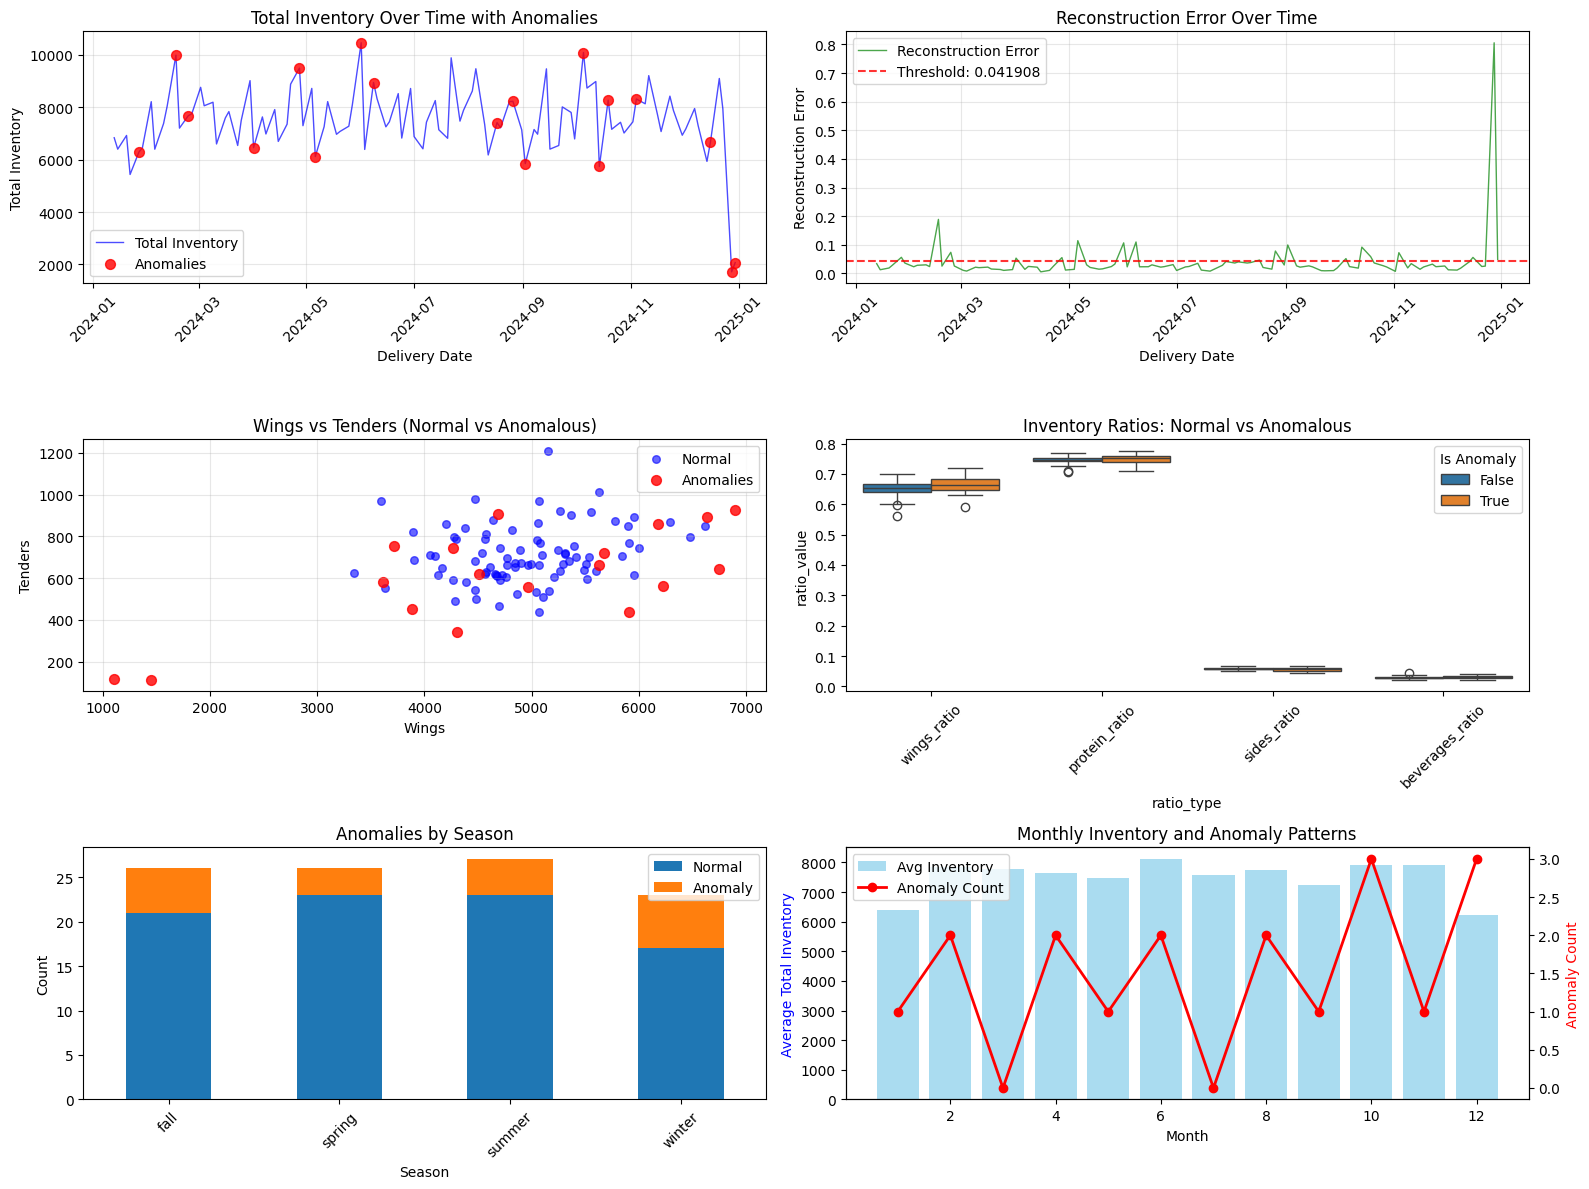

In [61]:
# Enhanced inventory anomaly visualization plots
plt.figure(figsize=(16, 12))

# Sort by delivery date
df_sorted = df.sort_values('delivery_date')

# Plot 1: Total inventory over time with anomalies highlighted
plt.subplot(3, 2, 1)
plt.plot(df_sorted['delivery_date'], df_sorted['total_inventory'],
         label='Total Inventory', alpha=0.7, color='blue', linewidth=1)
anomaly_data = df_sorted[df_sorted['is_anomaly']]
if len(anomaly_data) > 0:
    plt.scatter(anomaly_data['delivery_date'], anomaly_data['total_inventory'],
               color='red', label='Anomalies', s=50, alpha=0.8, zorder=5)
plt.title('Total Inventory Over Time with Anomalies')
plt.xlabel('Delivery Date')
plt.ylabel('Total Inventory')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 2: Reconstruction error over time
plt.subplot(3, 2, 2)
plt.plot(df_sorted['delivery_date'], df_sorted['reconstruction_error'],
         label='Reconstruction Error', alpha=0.7, color='green', linewidth=1)
plt.axhline(y=threshold, color='r', linestyle='--',
           label=f'Threshold: {threshold:.6f}', alpha=0.8)
plt.title('Reconstruction Error Over Time')
plt.xlabel('Delivery Date')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 3: Wings vs Tenders with anomalies
plt.subplot(3, 2, 3)
normal_data = df[~df['is_anomaly']]
if len(normal_data) > 0:
    plt.scatter(normal_data['wings'], normal_data['tenders'],
               alpha=0.6, color='blue', label='Normal', s=30)
if len(anomaly_data) > 0:
    plt.scatter(anomaly_data['wings'], anomaly_data['tenders'],
               alpha=0.8, color='red', label='Anomalies', s=50)
plt.xlabel('Wings')
plt.ylabel('Tenders')
plt.title('Wings vs Tenders (Normal vs Anomalous)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Inventory ratios comparison
plt.subplot(3, 2, 4)
ratio_data = pd.melt(df, id_vars=['is_anomaly'],
                    value_vars=['wings_ratio', 'protein_ratio', 'sides_ratio', 'beverages_ratio'],
                    var_name='ratio_type', value_name='ratio_value')
sns.boxplot(x='ratio_type', y='ratio_value', hue='is_anomaly', data=ratio_data)
plt.title('Inventory Ratios: Normal vs Anomalous')
plt.xticks(rotation=45)
plt.legend(title='Is Anomaly')

# Plot 5: Seasonal anomaly distribution
plt.subplot(3, 2, 5)
seasonal_counts = df.groupby(['season', 'is_anomaly']).size().unstack(fill_value=0)
if len(seasonal_counts.columns) > 1:
    seasonal_counts.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Anomalies by Season')
    plt.xlabel('Season')
    plt.ylabel('Count')
    plt.legend(['Normal', 'Anomaly'])
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No anomalies detected', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Anomalies by Season')

# Plot 6: Monthly patterns
plt.subplot(3, 2, 6)
monthly_stats = df.groupby('month').agg({
    'total_inventory': 'mean',
    'is_anomaly': 'sum'
}).reset_index()
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.bar(monthly_stats['month'], monthly_stats['total_inventory'],
        alpha=0.7, color='skyblue', label='Avg Inventory')
ax2.plot(monthly_stats['month'], monthly_stats['is_anomaly'],
         color='red', marker='o', linewidth=2, label='Anomaly Count')

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Total Inventory', color='blue')
ax2.set_ylabel('Anomaly Count', color='red')
plt.title('Monthly Inventory and Anomaly Patterns')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

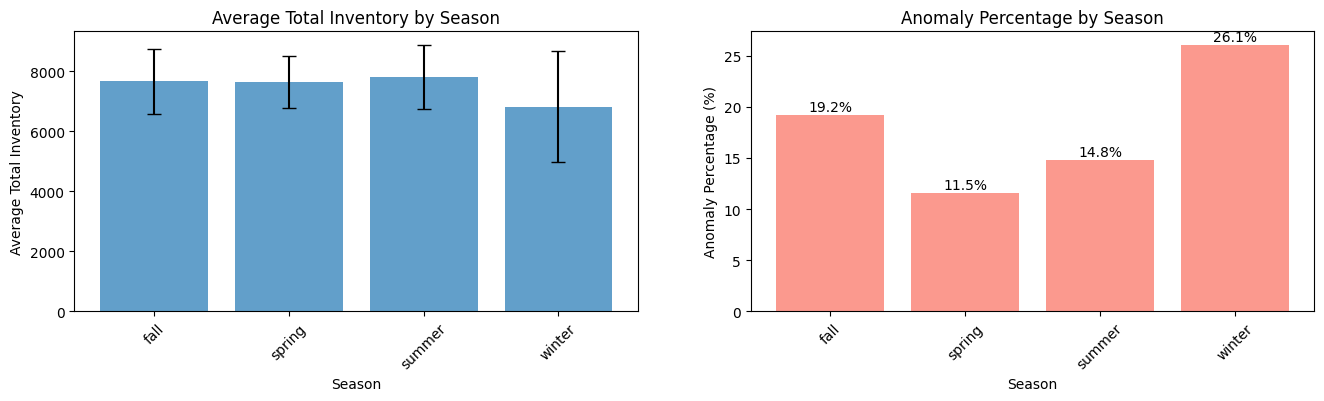

In [64]:
# Enhanced seasonal and temporal analysis
plt.figure(figsize=(16, 8))

# Plot 1: Seasonal inventory patterns with error bars
plt.subplot(2, 2, 1)
seasonal_stats = df.groupby('season').agg({
    'total_inventory': ['mean', 'std', 'count'],
    'is_anomaly': 'sum'
}).round(1)

# Flatten column names
seasonal_stats.columns = ['_'.join(col).strip() for col in seasonal_stats.columns]
seasonal_stats = seasonal_stats.reset_index()

plt.bar(seasonal_stats['season'], seasonal_stats['total_inventory_mean'],
        yerr=seasonal_stats['total_inventory_std'], capsize=5, alpha=0.7)
plt.title('Average Total Inventory by Season')
plt.ylabel('Average Total Inventory')
plt.xlabel('Season')
plt.xticks(rotation=45)

# Plot 2: Anomaly percentage by season
plt.subplot(2, 2, 2)
seasonal_stats['anomaly_percentage'] = 100 * seasonal_stats['is_anomaly_sum'] / seasonal_stats['total_inventory_count']
colors = ['skyblue' if x == 0 else 'salmon' for x in seasonal_stats['is_anomaly_sum']]
bars = plt.bar(seasonal_stats['season'], seasonal_stats['anomaly_percentage'], color=colors, alpha=0.8)
plt.title('Anomaly Percentage by Season')
plt.ylabel('Anomaly Percentage (%)')
plt.xlabel('Season')
plt.xticks(rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom')

In [65]:
# Summary statistics table
print("\n" + "="*60)
print("INVENTORY DELIVERY ANOMALY ANALYSIS SUMMARY")
print("="*60)

print(f"\nDataset Overview:")
print(f"  • Total delivery windows: {len(df)}")
print(f"  • Date range: {df['delivery_date'].min().strftime('%Y-%m-%d')} to {df['delivery_date'].max().strftime('%Y-%m-%d')}")
print(f"  • Average total inventory per delivery: {df['total_inventory'].mean():.0f} items")

if df['is_anomaly'].sum() > 0:
    print(f"\nAnomaly Detection Results:")
    print(f"  • Anomalies detected: {df['is_anomaly'].sum()} out of {len(df)} deliveries ({100*df['is_anomaly'].sum()/len(df):.1f}%)")
    print(f"  • Most anomalous season: {seasonal_stats.loc[seasonal_stats['anomaly_percentage'].idxmax(), 'season']}")
    print(f"  • Average reconstruction error: {df['reconstruction_error'].mean():.6f}")
else:
    print(f"\nAnomaly Detection Results:")
    print(f"  • No anomalies detected with current threshold ({threshold:.6f})")
    print(f"  • Consider using 'sensitive' threshold for more detection")

print(f"\nInventory Patterns:")
print(f"  • Highest inventory category: {df[inventory_features].mean().idxmax()} (avg: {df[inventory_features].mean().max():.0f})")
print(f"  • Most variable category: {df[inventory_features].std().idxmax()} (std: {df[inventory_features].std().max():.0f})")
print(f"  • Average protein ratio: {df['protein_ratio'].mean():.2f}")
print(f"  • Monday vs Saturday deliveries: {df['is_monday'].sum()} vs {df['is_saturday'].sum()}")


INVENTORY DELIVERY ANOMALY ANALYSIS SUMMARY

Dataset Overview:
  • Total delivery windows: 102
  • Date range: 2024-01-13 to 2024-12-30
  • Average total inventory per delivery: 7510 items

Anomaly Detection Results:
  • Anomalies detected: 18 out of 102 deliveries (17.6%)
  • Most anomalous season: winter
  • Average reconstruction error: 0.039560

Inventory Patterns:
  • Highest inventory category: wings (avg: 4916)
  • Most variable category: wings (std: 899)
  • Average protein ratio: 0.75
  • Monday vs Saturday deliveries: 51 vs 51


In [68]:
# Save the trained autoencoder model
best_model.save('inventory_autoencoder_model.h5')
print("✅ Model saved as 'inventory_autoencoder_model.keras'")

✅ Model saved as 'inventory_autoencoder_model.keras'


In [67]:
# Save the scaler for preprocessing new data
import joblib
joblib.dump(scaler, 'inventory_scaler.pkl')
print("✅ Scaler saved as 'inventory_scaler.pkl'")

✅ Scaler saved as 'inventory_scaler.pkl'


In [69]:
joblib.dump(study, 'optuna_study.pkl')

['optuna_study.pkl']

In [70]:
import json
with open('anomaly_threshold.json', 'w') as f:
    json.dump({"balanced": 0.041908}, f)

In [71]:
import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)